In [171]:
# lib for extraction, manipulation, analysis
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore

# train test split
from sklearn.model_selection import train_test_split

# Linear regression
from sklearn.linear_model import LinearRegression

# regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Encoder
from sklearn.preprocessing import LabelEncoder


In [172]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\EDA\cardekho.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [173]:
df=df.drop(columns = ['name'])
df=df.drop(columns = ['year'])


In [174]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [175]:
# EDA (exploratory data analysis)
# check for shape
df.shape

(8128, 10)

In [176]:
#check for size
df.size

81280

In [177]:
#check for info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   selling_price       8128 non-null   int64  
 1   km_driven           8128 non-null   int64  
 2   fuel                8128 non-null   object 
 3   seller_type         8128 non-null   object 
 4   transmission        8128 non-null   object 
 5   owner               8128 non-null   object 
 6   mileage(km/ltr/kg)  7907 non-null   float64
 7   engine              7907 non-null   float64
 8   max_power           7913 non-null   object 
 9   seats               7907 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 635.1+ KB


In [178]:
#check for stats
df.describe()

,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [179]:
# check for data types
df.dtypes

selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [180]:
# check for null values
df.isnull().sum()

selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [181]:
df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mode()[0])
df["engine"] = df["engine"].fillna(df["engine"].mode()[0])
df["seats"] = df["seats"].fillna(df["seats"].mode()[0])
df["max_power"] = df["max_power"].fillna(df["max_power"].mode()[0])

In [182]:
# check for null values
df.isnull().sum()

selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

analysis of numerical column

In [183]:
# analysis of selling_price
mean=df["selling_price"].mean()
median=df["selling_price"].median()
mode=df["selling_price"].mode()[0]
var=df["selling_price"].var()
std=df["selling_price"].std()
skew=df["selling_price"].skew()

print(f"analysis of selling_price:\nmean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}")

analysis of selling_price:
mean:638271.8077017716
median:450000.0
mode:300000
var:650044550668.6099
std:806253.4035082331
skew:4.193533440675855


In [184]:
# analysis of km_driven
mean=df["km_driven"].mean()
median=df["km_driven"].median()
mode=df["km_driven"].mode()[0]
var=df["km_driven"].var()
std=df["km_driven"].std()
skew=df["km_driven"].skew()

print(f"analysis of km_driven:\nmean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}")

analysis of km_driven:
mean:69819.51082677166
median:60000.0
mode:120000
var:3197965266.0825005
std:56550.554958218585
skew:11.170909783549087


In [185]:
# analysis of mileage(km/ltr/kg)
mean=df["mileage(km/ltr/kg)"].mean()
median=df["mileage(km/ltr/kg)"].median()
mode=df["mileage(km/ltr/kg)"].mode()[0]
var=df["mileage(km/ltr/kg)"].var()
std=df["mileage(km/ltr/kg)"].std()
skew=df["mileage(km/ltr/kg)"].skew()

print(f"analysis of mileage(km/ltr/kg):\nmean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}")

analysis of mileage(km/ltr/kg):
mean:19.404677657480313
median:19.1
mode:18.9
var:15.862448720986626
std:3.9827689766024124
skew:-0.1339817749913445


In [186]:
# analysis of engine
mean=df["engine"].mean()
median=df["engine"].median()
mode=df["engine"].mode()[0]
var=df["engine"].var()
std=df["engine"].std()
skew=df["engine"].skew()

print(f"analysis of engine:\nmean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}")

analysis of engine:
mean:1452.8981299212599
median:1248.0
mode:1248.0
var:248199.9721485841
std:498.19672033101955
skew:1.1753055440141613


In [187]:
# analysis of seats
mean=df["seats"].mean()
median=df["seats"].median()
mode=df["seats"].mode()[0]
var=df["seats"].var()
std=df["seats"].std()
skew=df["seats"].skew()

print(f"analysis of seats:\nmean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}")

analysis of seats:
mean:5.405388779527559
median:5.0
mode:5.0
var:0.9003622457804173
std:0.948874199133066
skew:2.015507247545297


In [188]:
#unique values in categorical column
owner=df["owner"].unique()
fuel=df["fuel"].unique()
transmission=df["transmission"].unique()
print(f"owner:{owner}\nfuel:{fuel},\ntransmission:{transmission}")

owner:['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
fuel:['Diesel' 'Petrol' 'LPG' 'CNG'],
transmission:['Manual' 'Automatic']


In [189]:
# count values of categorical column
owner=df["owner"].value_counts()
fuel=df["fuel"].value_counts()
transmission=df["transmission"].value_counts()
print(f"owner:{owner} \n{("-")*50}\nfuel:{fuel}\n{("-")*50}\ntransmission:{transmission}")

owner:owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64 
--------------------------------------------------
fuel:fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
--------------------------------------------------
transmission:transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64


<Axes: xlabel='selling_price', ylabel='Count'>

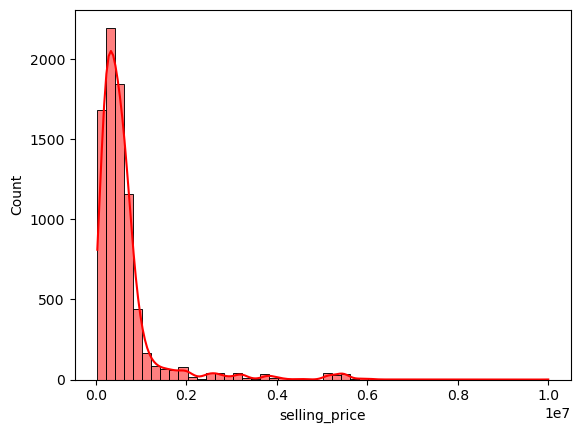

In [190]:
# univariate numerical column analysis 
sns.histplot(data=df,x="selling_price",kde=True,bins=50,color="red")

<Axes: xlabel='km_driven', ylabel='Count'>

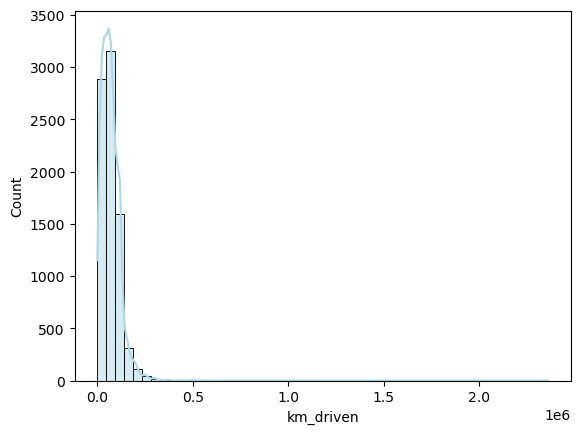

In [191]:
# univariate numerical column analysis 
sns.histplot(data=df,x="km_driven",kde=True,bins=50,color="lightblue")

<Axes: xlabel='engine', ylabel='Count'>

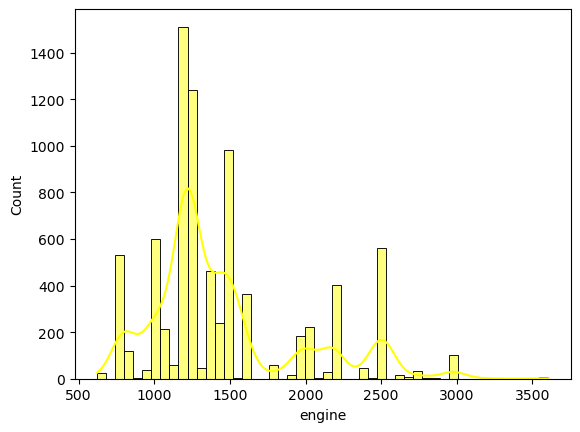

In [192]:
# univariate numerical column analysis 
sns.histplot(data=df,x="engine",kde=True,bins=50,color="Yellow")

<Axes: xlabel='mileage(km/ltr/kg)', ylabel='Count'>

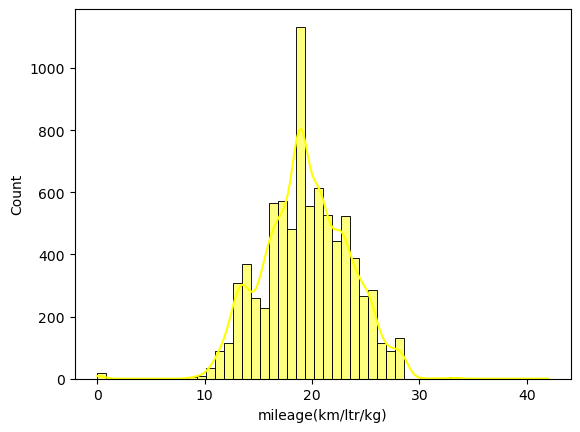

In [193]:
# univariate numerical column analysis 
sns.histplot(data=df,x="mileage(km/ltr/kg)",kde=True,bins=50,color="Yellow")

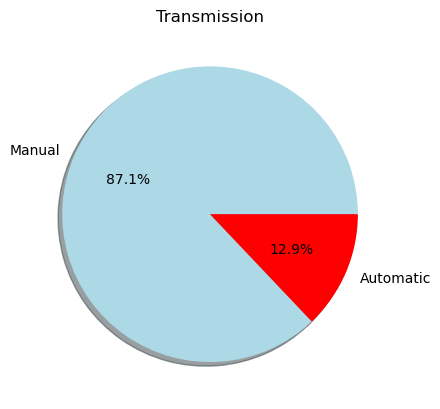

In [194]:
# univariate analysis of categorical column
val_count=df["transmission"].value_counts()
plt.pie(val_count,labels=val_count.index,autopct='%1.1f%%',shadow=True, colors=["lightblue", "red"])
plt.title('Transmission')
plt.show()

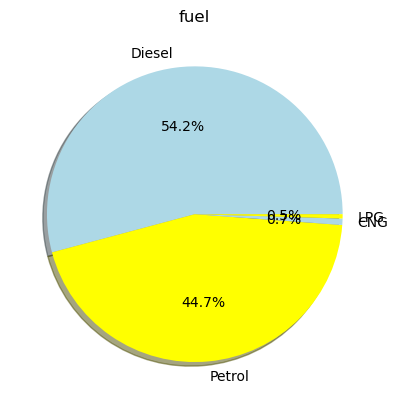

In [195]:
# univariate analysis of categorical column
val_count=df["fuel"].value_counts()
plt.pie(val_count,labels=val_count.index,autopct='%1.1f%%',shadow=True, colors=["lightblue", "yellow"])
plt.title('fuel')
plt.show()

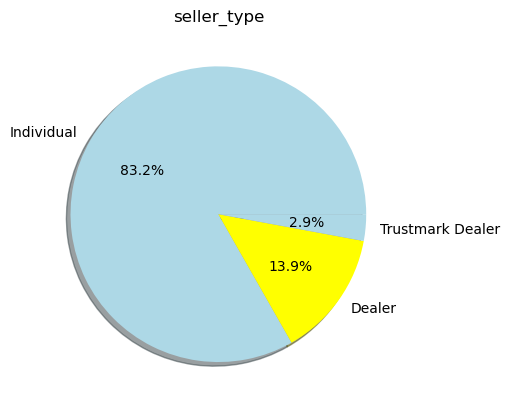

In [196]:
# univariate analysis of categorical column
val_count=df["seller_type"].value_counts()
plt.pie(val_count,labels=val_count.index,autopct='%1.1f%%',shadow=True, colors=["lightblue", "yellow"])
plt.title('seller_type')
plt.show()

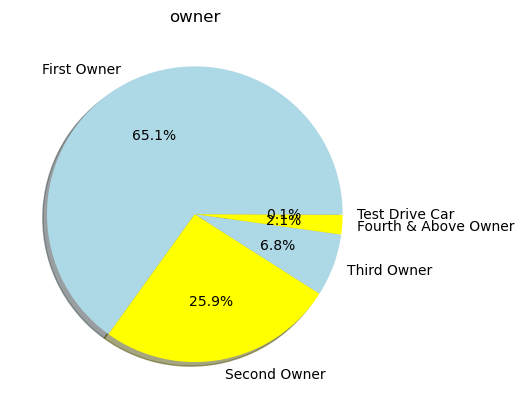

In [197]:
# univariate analysis of categorical column
val_count=df["owner"].value_counts()
plt.pie(val_count,labels=val_count.index,autopct='%1.1f%%',shadow=True, colors=["lightblue", "yellow"])
plt.title('owner')
plt.show()

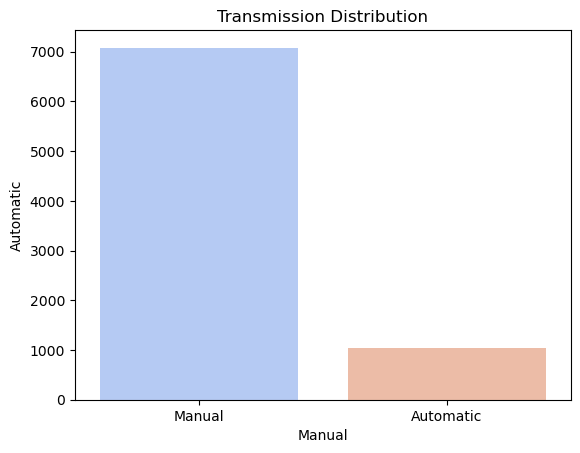

In [198]:
sns.countplot( data=df,x='transmission',hue="transmission" ,palette='coolwarm')
plt.title('Transmission Distribution')
plt.xlabel('Manual')
plt.ylabel('Automatic')
plt.show()

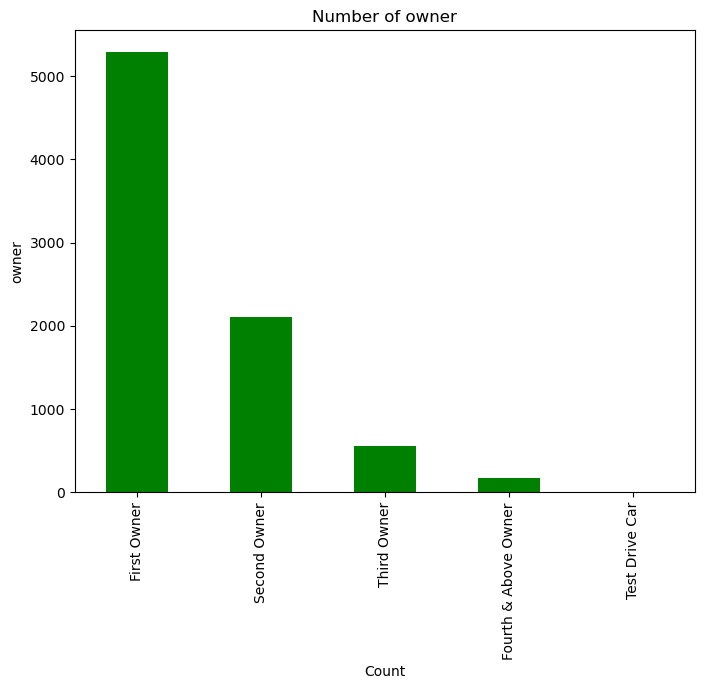

In [199]:
df['owner'].value_counts().plot.bar(color='green', figsize=(8, 6))
plt.title('Number of owner')
plt.xlabel('Count')
plt.ylabel('owner')
plt.show()

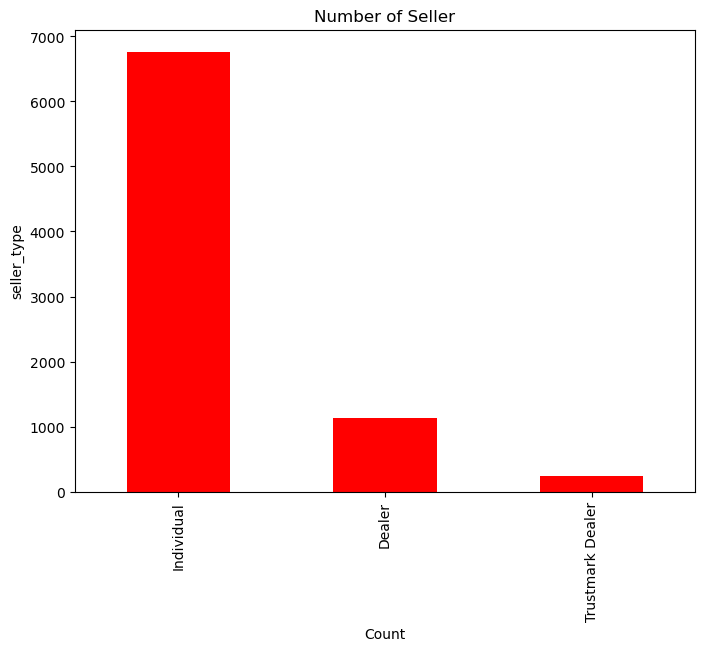

In [200]:
df['seller_type'].value_counts().plot.bar(color='red', figsize=(8, 6))
plt.title('Number of Seller')
plt.xlabel('Count')
plt.ylabel('seller_type')
plt.show()

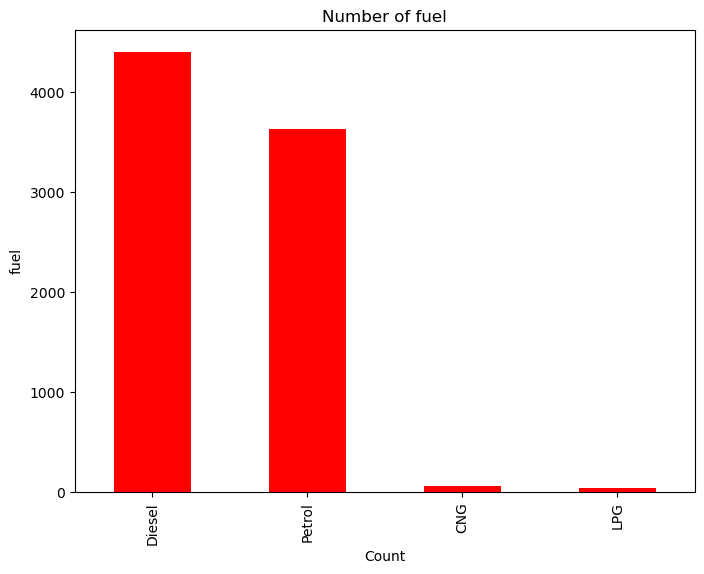

In [201]:
df['fuel'].value_counts().plot.bar(color='red', figsize=(8, 6))
plt.title('Number of fuel')
plt.xlabel('Count')
plt.ylabel('fuel')
plt.show()

<Axes: xlabel='selling_price', ylabel='km_driven'>

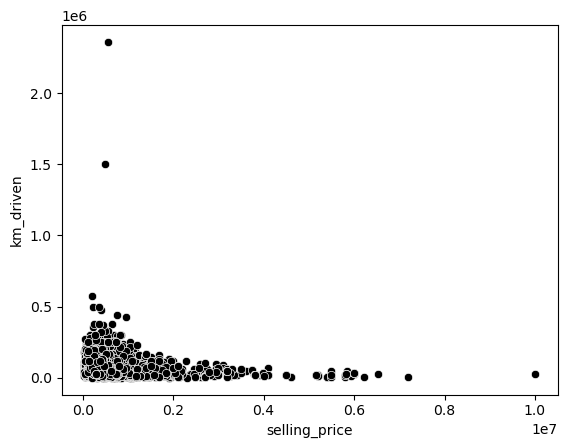

In [203]:
# bivariate analysis of numerical columnApplicantIncome        
sns.scatterplot(data=df,x="selling_price",y="km_driven",color="black")

<Axes: xlabel='fuel', ylabel='mileage(km/ltr/kg)'>

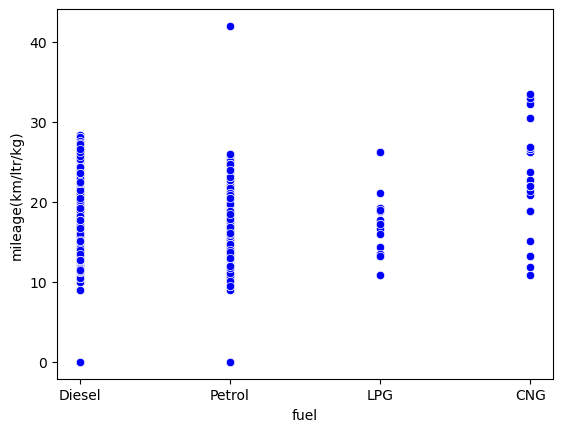

In [204]:
# bivariate analysis of numerical columnApplicantIncome        
sns.scatterplot(data=df,x="fuel",y="mileage(km/ltr/kg)",color="blue")

<Axes: xlabel='seller_type', ylabel='owner'>

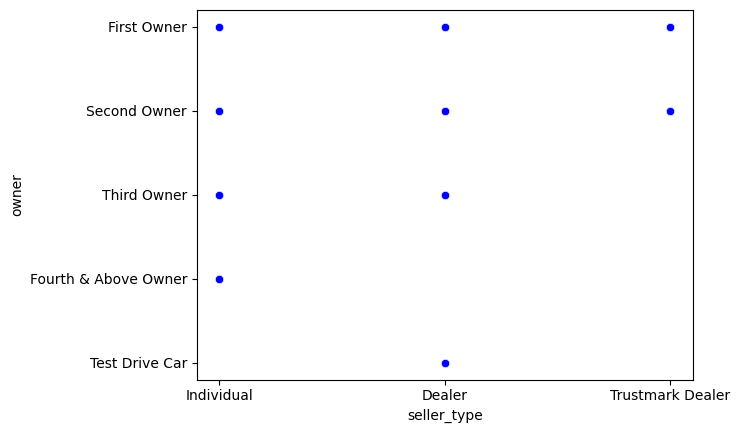

In [205]:
# bivariate analysis of numerical columnApplicantIncome        
sns.scatterplot(data=df,x="seller_type",y="owner",color="blue")

In [208]:
# checking and handling of outliers

def outliers_handling(df, col):
    sns.boxplot(df[col], color = "Red",saturation=0.8)
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    df.loc[df[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(df.head())

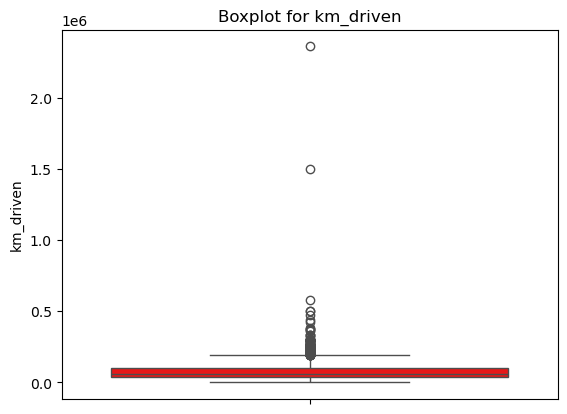

25% Quantile q1 = 35000.0
75% Quantile q3 = 98000.0
IQR = 63000.0

--------------------------------------------------------------------------------
Lower Tail = -59500.0
Upper Tail = 192500.0
--------------------------------------------------------------------------------

Outliers :
       selling_price  km_driven    fuel seller_type transmission         owner  \
272          320000     193000  Diesel  Individual       Manual   First Owner   
287          210000     207890  Diesel  Individual       Manual  Second Owner   
394          250000     240000  Diesel  Individual       Manual   Third Owner   
396          340000     214000  Petrol  Individual       Manual  Second Owner   
397          340000     214000  Diesel  Individual       Manual  Second Owner   
...             ...        ...     ...         ...          ...           ...   
8031         275000     195000  Diesel  Individual       Manual   First Owner   
8033         450000     200000  Diesel  Individual       Manual  S

In [209]:
# outlier handling for ApplicantIncome
outliers_handling(df,"km_driven")

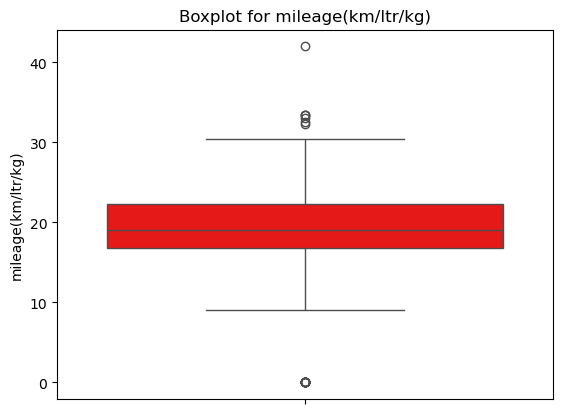

25% Quantile q1 = 16.8
75% Quantile q3 = 22.2775
IQR = 5.477499999999999

--------------------------------------------------------------------------------
Lower Tail = 8.583750000000002
Upper Tail = 30.49375
--------------------------------------------------------------------------------

Outliers :
       selling_price  km_driven    fuel seller_type transmission  \
35           330000      10000     CNG  Individual       Manual   
170        10000000      30000  Petrol  Individual    Automatic   
644          135000      28900  Petrol  Individual       Manual   
785          120000      90000  Petrol  Individual       Manual   
1649         105000     128000  Petrol  Individual       Manual   
1676        1700000     110000  Diesel  Individual    Automatic   
2137        1650000      64788  Diesel      Dealer    Automatic   
2312         270000      80000     CNG  Individual       Manual   
2366         110000      80000  Petrol  Individual       Manual   
2725         184000      150

In [210]:
# outlier handling for ApplicantIncome
outliers_handling(df,"mileage(km/ltr/kg)")

<Axes: xlabel='selling_price', ylabel='km_driven'>

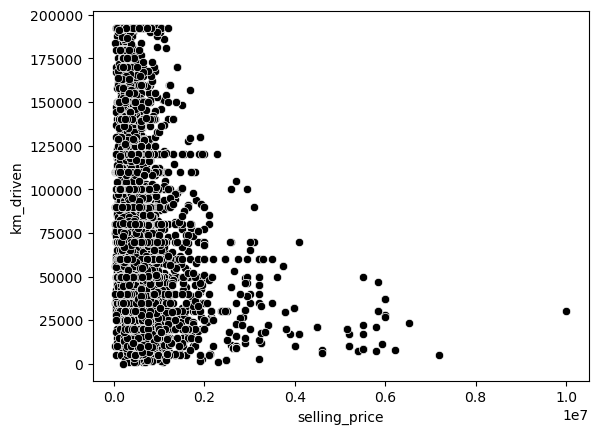

In [211]:
# bivariate analysis of numerical columnApplicantIncome        
sns.scatterplot(data=df,x="selling_price",y="km_driven",color="black")

In [212]:
# encoding categorical data

def encode_data(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = le.fit_transform(df[col])

In [213]:
encode_data(df)

In [214]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,1,1,1,0,23.40,1248.0,244,5.0
1,370000,120000,1,1,1,2,21.14,1498.0,15,5.0
2,158000,140000,3,1,1,4,17.70,1497.0,253,5.0
3,225000,127000,1,1,1,0,23.00,1396.0,295,5.0
4,130000,120000,3,1,1,0,16.10,1298.0,287,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,3,1,1,0,18.50,1197.0,267,5.0
8124,135000,119000,1,1,1,1,16.80,1493.0,30,5.0
8125,382000,120000,1,1,1,0,19.30,1248.0,241,5.0
8126,290000,25000,1,1,1,0,23.57,1396.0,232,5.0


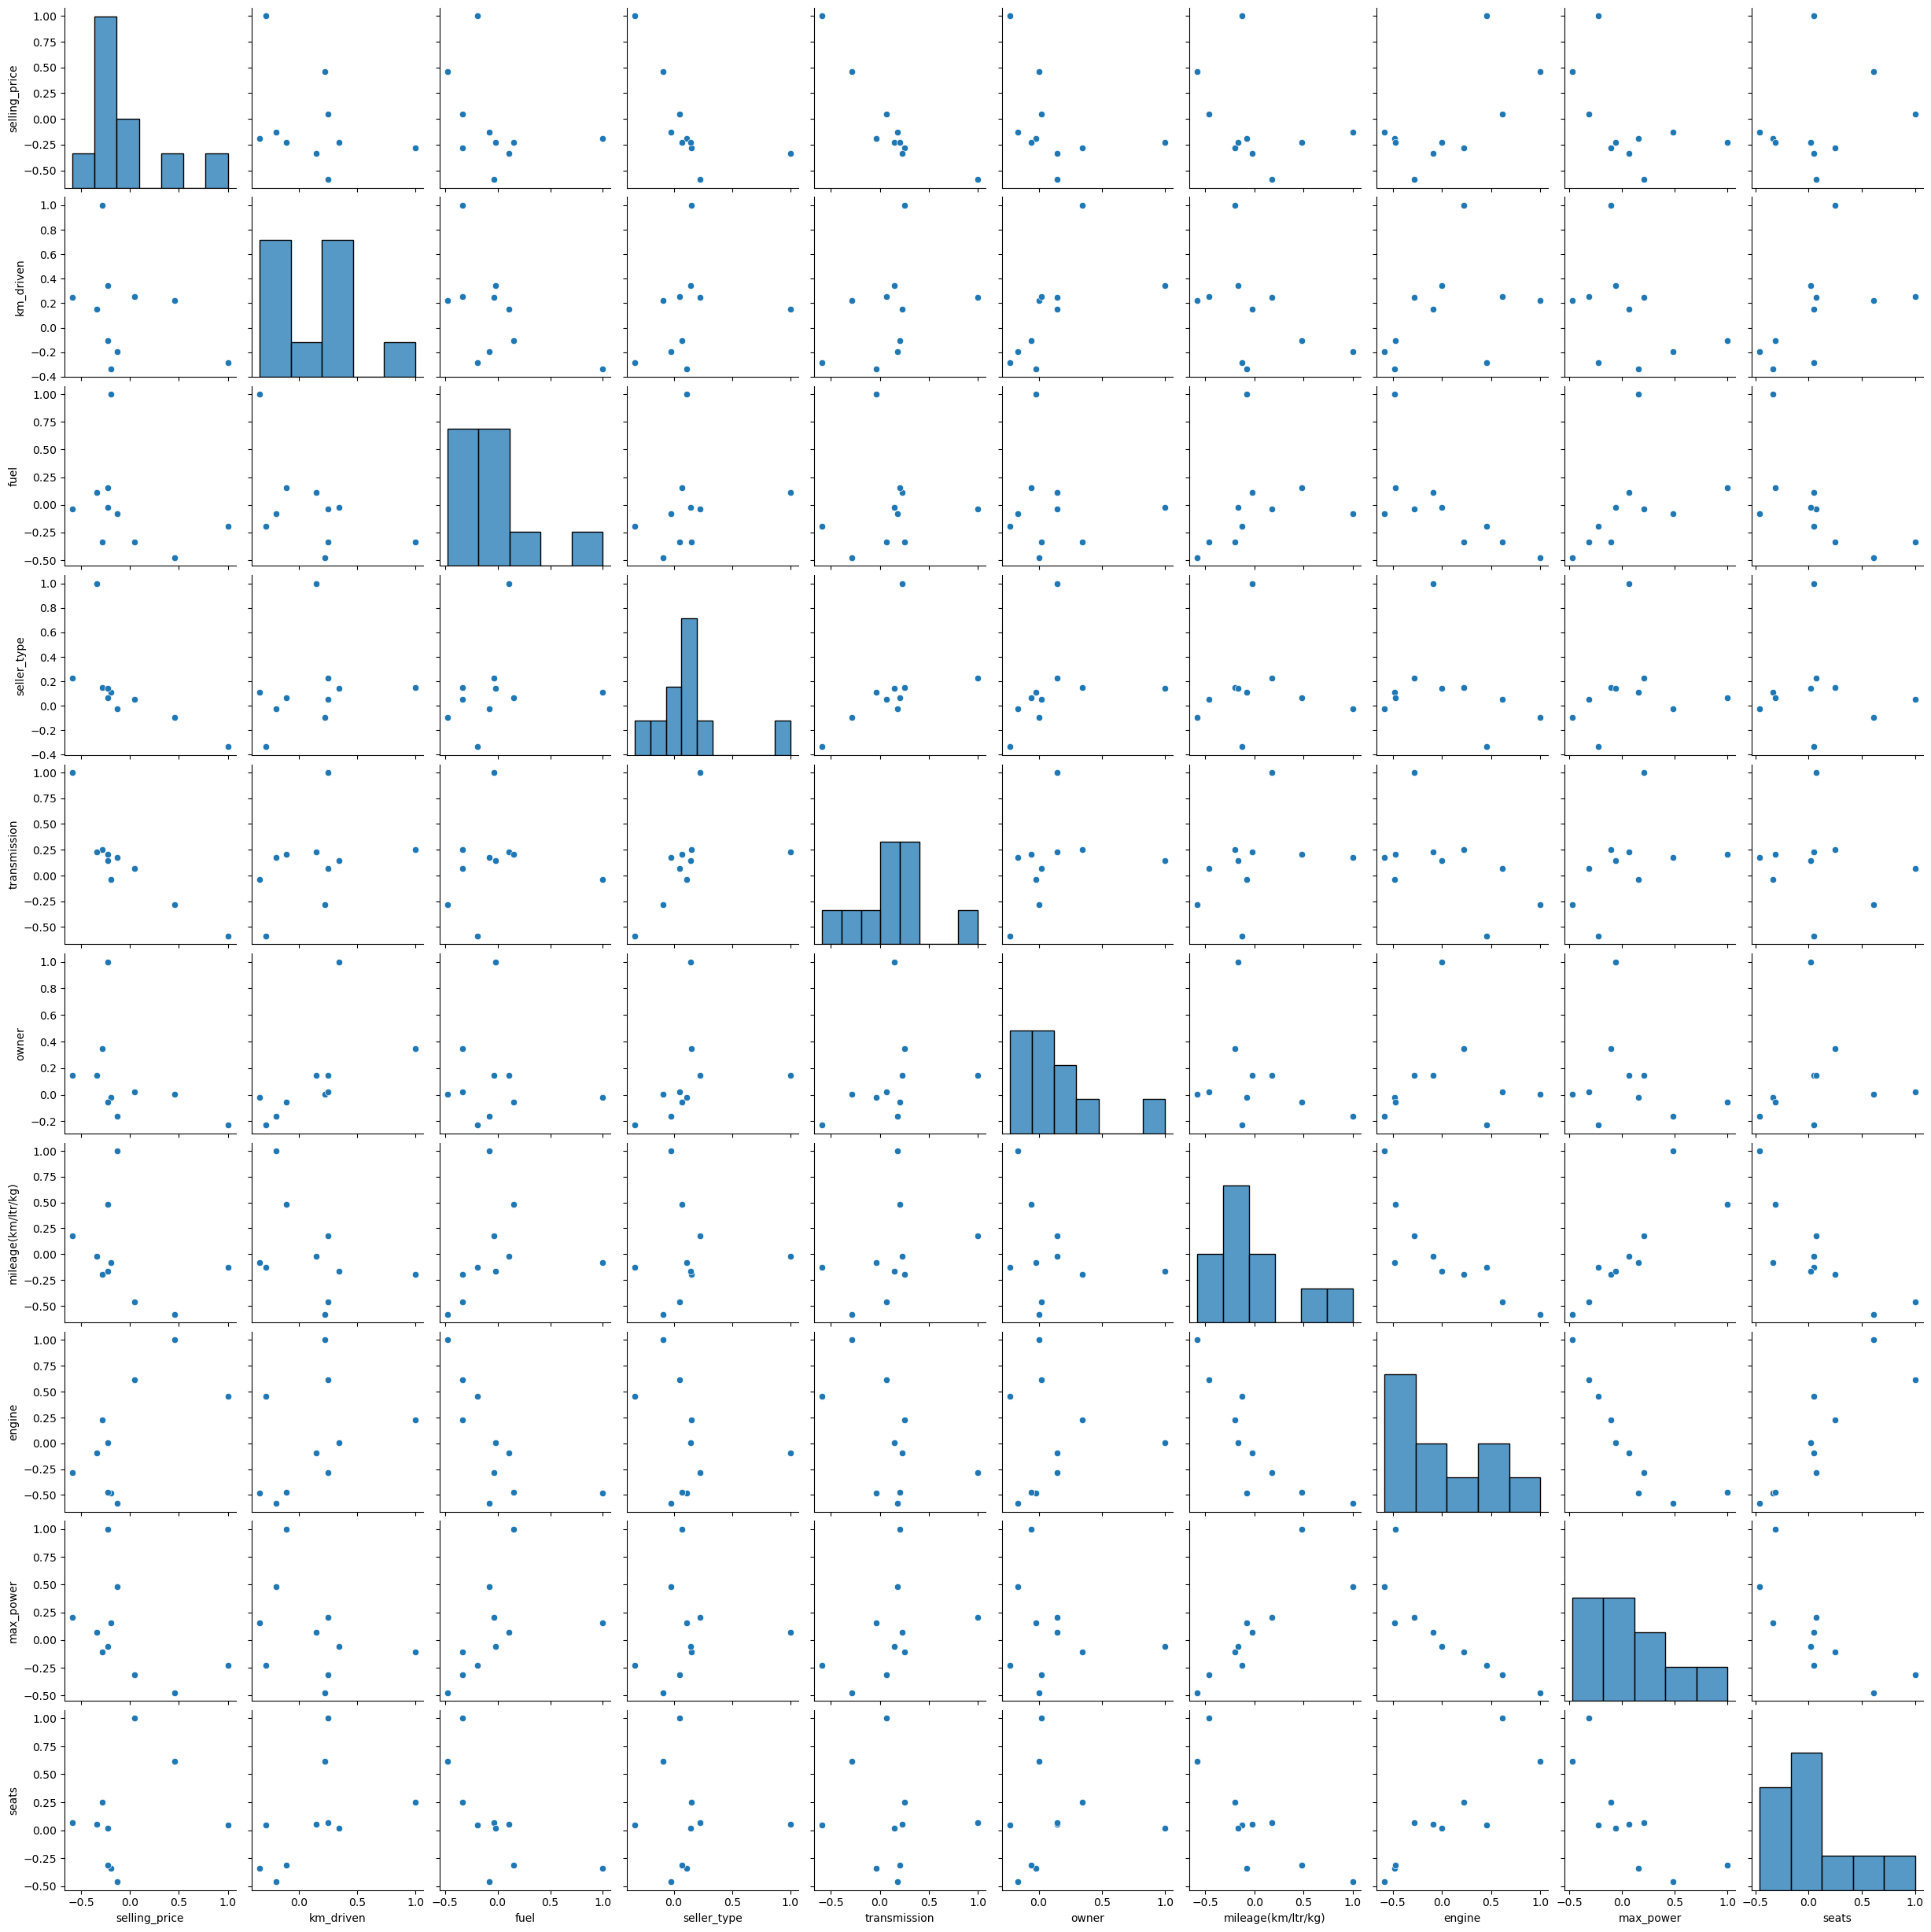

In [215]:
# visualization of correlation of numerical column
sns.pairplot(df.corr())

<Axes: >

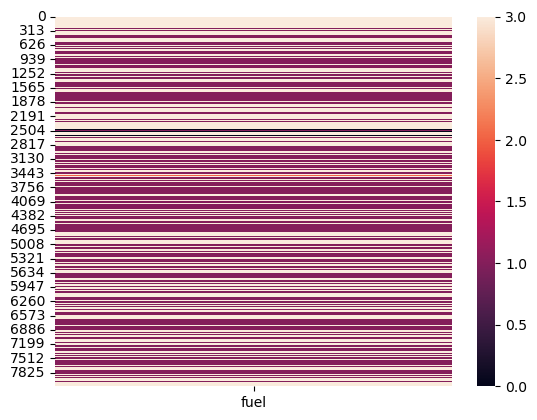

In [216]:
corr=df.iloc[:,2:3]
sns.heatmap(corr)

In [217]:
# feature selection and check for association between all columns

df.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
selling_price,1.000000,-0.285015,-0.194029,-0.335857,-0.588845,-0.229174,-0.129778,0.458345,-0.224908,0.047135
km_driven,-0.285015,1.000000,-0.334220,0.149183,0.248512,0.345091,-0.195805,0.224437,-0.105401,0.250641
fuel,-0.194029,-0.334220,1.000000,0.110512,-0.035255,-0.022339,-0.081412,-0.479134,0.154133,-0.337575
seller_type,-0.335857,0.149183,0.110512,1.000000,0.227871,0.143443,-0.022099,-0.091723,0.068349,0.051546
transmission,-0.588845,0.248512,-0.035255,0.227871,1.000000,0.147458,0.178184,-0.283986,0.207750,0.069070
owner,-0.229174,0.345091,-0.022339,0.143443,0.147458,1.000000,-0.163271,0.002719,-0.058229,0.019928
mileage(km/ltr/kg),-0.129778,-0.195805,-0.081412,-0.022099,0.178184,-0.163271,1.000000,-0.583066,0.479585,-0.461199
engine,0.458345,0.224437,-0.479134,-0.091723,-0.283986,0.002719,-0.583066,1.000000,-0.474104,0.612220
max_power,-0.224908,-0.105401,0.154133,0.068349,0.207750,-0.058229,0.479585,-0.474104,1.000000,-0.311405
seats,0.047135,0.250641,-0.337575,0.051546,0.069070,0.019928,-0.461199,0.612220,-0.311405,1.000000


<Axes: >

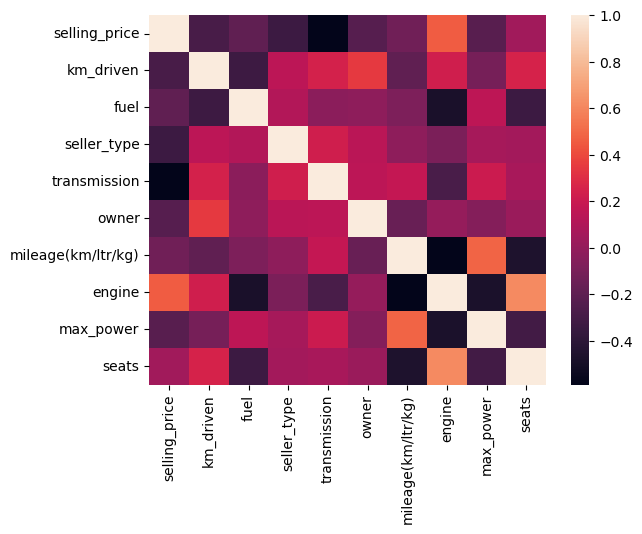

In [218]:
sns.heatmap(df.corr())

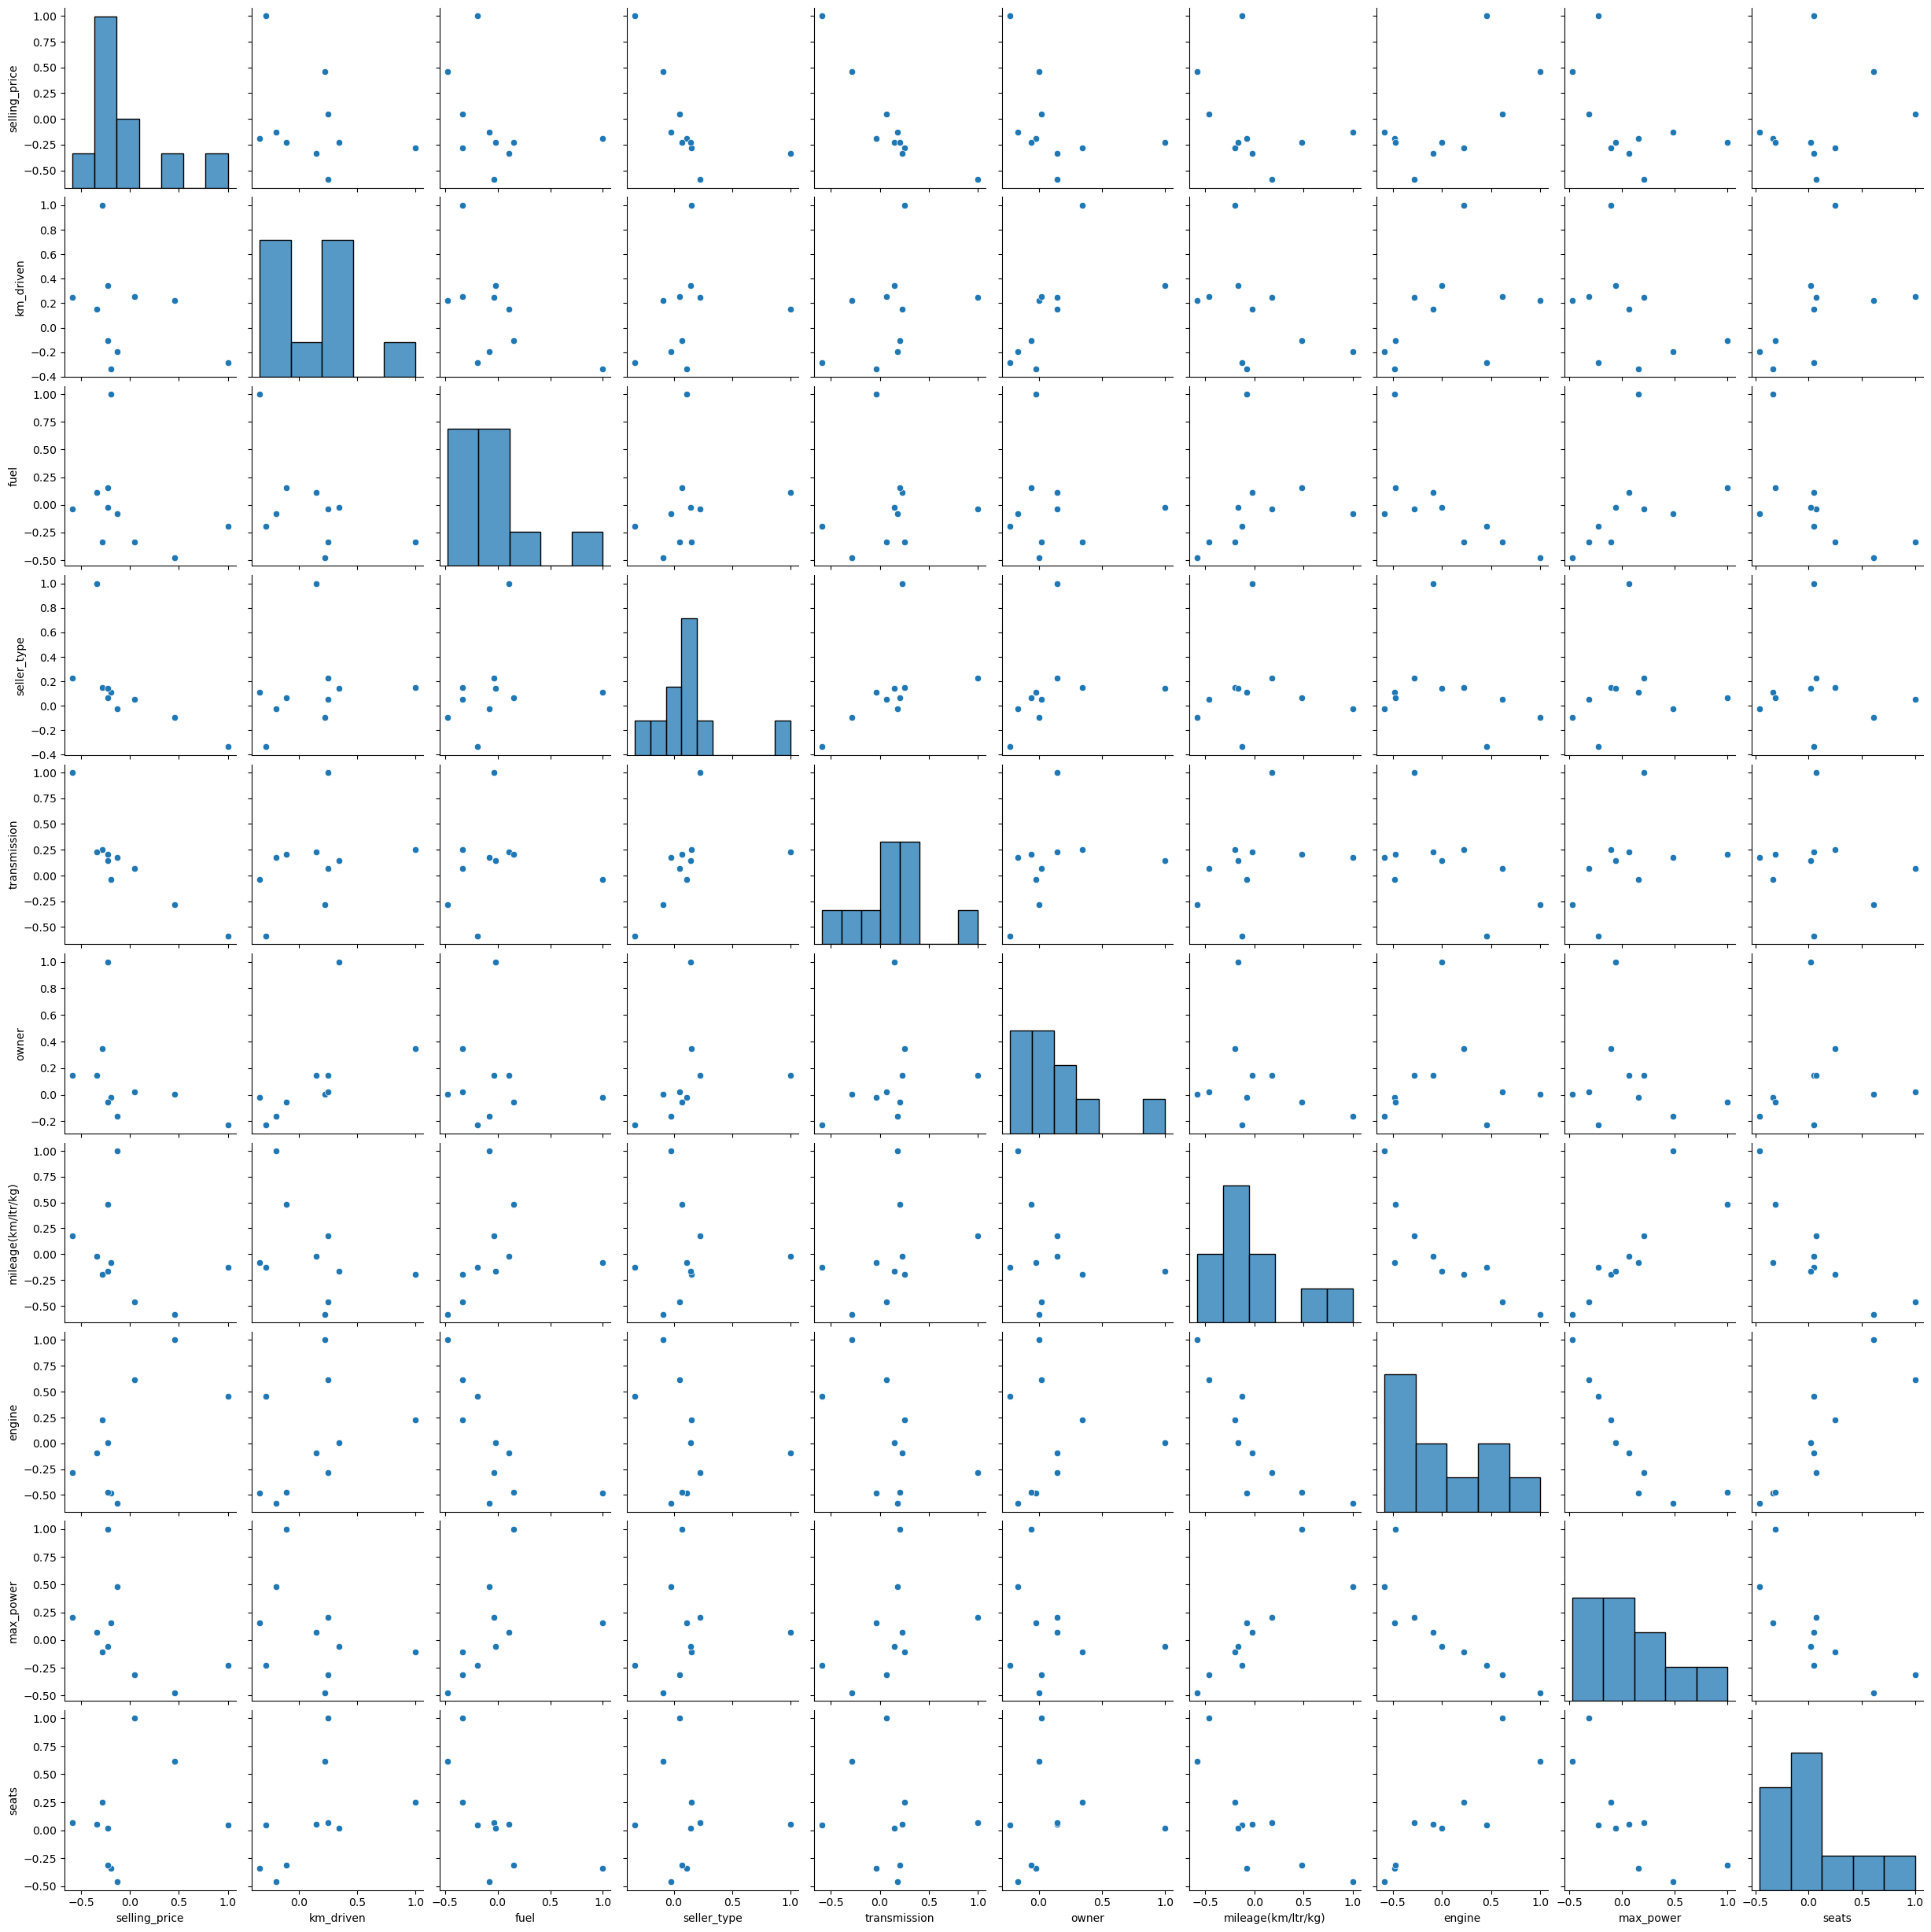

In [219]:
sns.pairplot(df.corr())

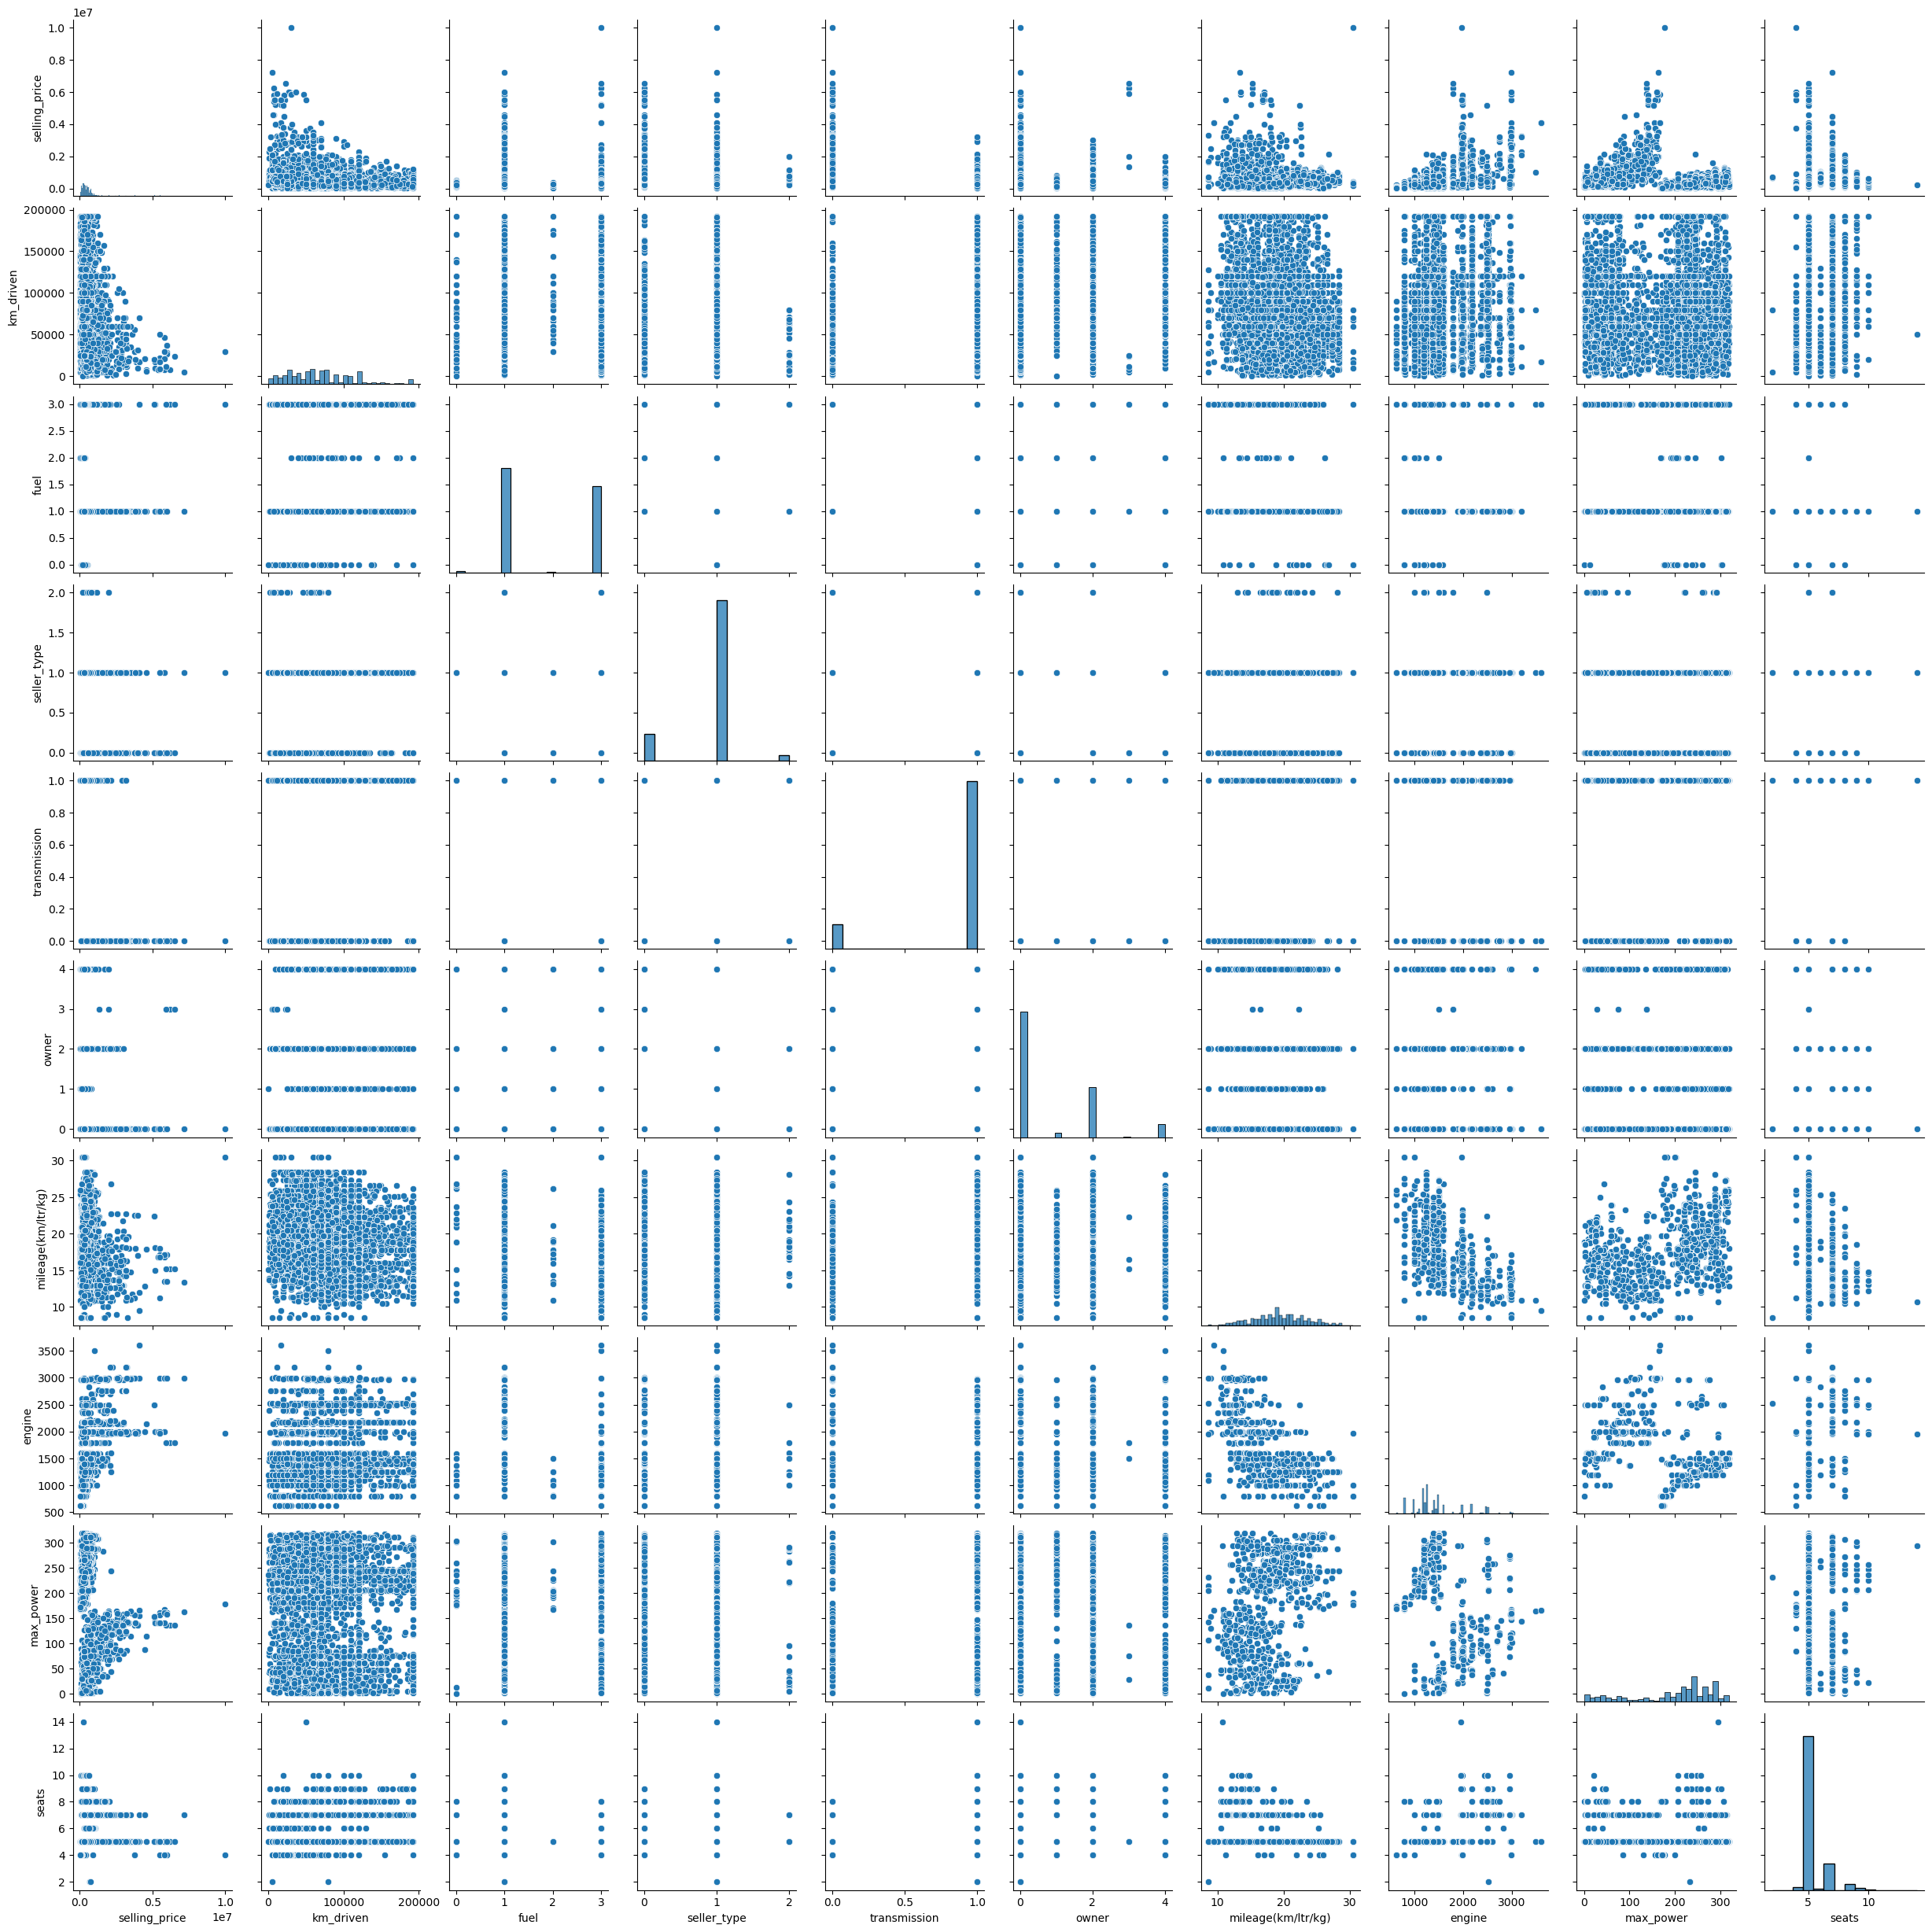

In [220]:
# multivariate analysis
sns.pairplot(df)

In [221]:
df1 = df.iloc[:, :12]
df1

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,1,1,1,0,23.40,1248.0,244,5.0
1,370000,120000,1,1,1,2,21.14,1498.0,15,5.0
2,158000,140000,3,1,1,4,17.70,1497.0,253,5.0
3,225000,127000,1,1,1,0,23.00,1396.0,295,5.0
4,130000,120000,3,1,1,0,16.10,1298.0,287,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,3,1,1,0,18.50,1197.0,267,5.0
8124,135000,119000,1,1,1,1,16.80,1493.0,30,5.0
8125,382000,120000,1,1,1,0,19.30,1248.0,241,5.0
8126,290000,25000,1,1,1,0,23.57,1396.0,232,5.0


In [222]:
vif_df = pd.DataFrame()

vif_df["Independant Feature"] = df1.columns

vif_df

,Independant Feature
0,selling_price
1,km_driven
2,fuel
3,seller_type
4,transmission
5,owner
6,mileage(km/ltr/kg)
7,engine
8,max_power
9,seats


In [223]:
a = df1.shape[1]
a

10

In [224]:
vif_list = []

for i in range(a):
    vif = variance_inflation_factor(df1.to_numpy(), i)
    vif_list.append(vif)

vif_df["VIF"] = vif_list

vif_df

,Independant Feature,VIF
0,selling_price,3.691722
1,km_driven,5.276893
2,fuel,4.871824
3,seller_type,7.034535
4,transmission,12.738966
5,owner,1.700310
6,mileage(km/ltr/kg),22.974170
7,engine,29.638879
8,max_power,8.184061
9,seats,52.619547


In [225]:
x = df1
y = df["selling_price"]

In [226]:
x.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,1,1,1,0,23.40,1248.0,244,5.0
1,370000,120000,1,1,1,2,21.14,1498.0,15,5.0
2,158000,140000,3,1,1,4,17.70,1497.0,253,5.0
3,225000,127000,1,1,1,0,23.00,1396.0,295,5.0
4,130000,120000,3,1,1,0,16.10,1298.0,287,5.0


In [227]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [228]:
#Train Test split

In [229]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=10)

In [230]:
xtrain.shape

(6502, 10)

In [231]:
xtest.shape

(1626, 10)

In [232]:
ytrain.shape

(6502,)

In [233]:
ytest.shape

(1626,)

#Model tainintraining 

In [234]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [235]:
lin_reg_model = lin_reg.fit(xtrain,ytrain) # linear regression working, bfl, cost, gradient descent
lin_reg_model

LinearRegression()

In [236]:
xtrain.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
3365,415000,90000,1,1,1,0,18.9,1248.0,244,5.0
6948,190000,60000,3,1,1,2,21.1,814.0,191,5.0
7977,550000,105000,1,0,1,0,21.7,1498.0,315,5.0
6708,575000,110000,1,1,1,2,15.1,2179.0,76,7.0
4652,980000,120000,1,1,1,2,15.1,2179.0,76,7.0


In [237]:
ytrain.head()

3365    415000
6948    190000
7977    550000
6708    575000
4652    980000
Name: selling_price, dtype: int64

In [238]:
ytrain_pred = lin_reg_model.predict(xtrain)
ytrain_pred

array([415000., 190000., 550000., ..., 310000., 650000., 420000.])

In [239]:
residual = ytrain - ytrain_pred
residual

3365   -4.656613e-10
6948   -9.022187e-10
7977    0.000000e+00
6708    1.164153e-10
4652    1.047738e-09
            ...     
3441   -1.164153e-10
1344   -4.656613e-10
4623   -6.402843e-10
7293    2.328306e-10
1289   -3.492460e-10
Name: selling_price, Length: 6502, dtype: float64

In [240]:
#assumption 


<Axes: xlabel='selling_price', ylabel='Density'>

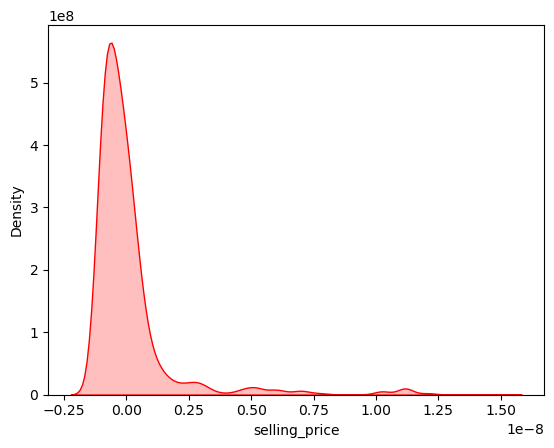

In [241]:
sns.kdeplot(residual, fill = True, color= "red")

In [242]:
stats, p_val = shapiro(residual)

if p_val >= 0.05:
    print("Null Hypothesis H0 is True")
    print("residual is normally distributed")
else:
    print("Alternative Hypothesis H1 is True")
    print("residual is NOt normally distributed")

Alternative Hypothesis H1 is True
residual is NOt normally distributed


C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6502.
  res = hypotest_fun_out(*samples, **kwds)


In [243]:
#Homoscadasticity

<Axes: xlabel='selling_price', ylabel='selling_price'>

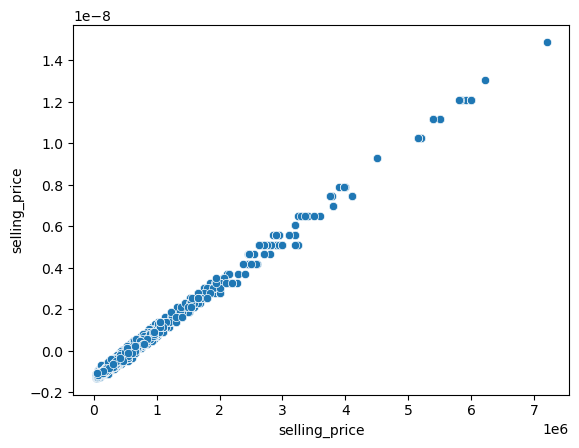

In [244]:
sns.scatterplot(x=ytrain, y=residual)

In [245]:
# for training

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  3.3023870314092835e-18
--------------------------------------------------------------------------------
mean absolute error (MAE) :  9.313925142265038e-10
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  1.8172471024627564e-09
--------------------------------------------------------------------------------
R2 Score :  1.0
--------------------------------------------------------------------------------


In [246]:
xtest

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
2077,150000,60000,1,1,1,4,17.00,1405.0,232,5.0
66,650000,30000,3,1,1,0,21.40,1197.0,270,5.0
7390,700000,80000,1,1,0,0,28.40,1248.0,245,5.0
6308,1500000,30000,1,1,1,0,16.00,2179.0,76,7.0
4922,800000,35000,3,1,1,0,18.60,1197.0,263,5.0
...,...,...,...,...,...,...,...,...,...,...
4259,3800000,20000,1,1,0,0,18.00,1969.0,141,5.0
161,175000,11000,3,0,1,0,23.95,998.0,222,5.0
3761,490000,67000,1,0,1,0,28.40,1248.0,244,5.0
5048,483000,15000,3,1,1,0,23.10,998.0,221,5.0


In [247]:
ytest

2077     150000
66       650000
7390     700000
6308    1500000
4922     800000
         ...   
4259    3800000
161      175000
3761     490000
5048     483000
5466      45000
Name: selling_price, Length: 1626, dtype: int64

In [248]:
ytest_pred = lin_reg_model.predict(xtest)
ytest_pred

array([150000., 650000., 700000., ..., 490000., 483000.,  45000.])

In [249]:
# for Testing

print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  3.901953423896687e-18
--------------------------------------------------------------------------------
mean absolute error (MAE) :  9.57287361857975e-10
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  1.975336281218134e-09
--------------------------------------------------------------------------------
R2 Score :  1.0
--------------------------------------------------------------------------------


In [250]:
#.pkl


In [251]:
import pickle

In [252]:
with open("CAR1.pkl", "wb") as f:
    pickle.dump(lin_reg_model,f)

In [253]:
test_data = xtrain.head(1)
test_data

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
3365,415000,90000,1,1,1,0,18.9,1248.0,244,5.0


In [254]:
with open("CAR1.pkl", "rb") as f:
    final_model = pickle.load(f)

In [255]:
print(f"Predicted charges = Rs. {final_model.predict(test_data)[0]}")

Predicted charges = Rs. 415000.00000000047


In [256]:
#take input from User
xtrain.head(1)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
3365,415000,90000,1,1,1,0,18.9,1248.0,244,5.0


In [257]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats'],
      dtype='object')

In [258]:
def Predict_Charges(selling_price,km_driven,fuel,seller_type,mileage,engine,max_power,seats):
    data = pd.DataFrame({"selling_price" : [selling_price],
                         "km_driven" : [km_driven],
                         "fuel" : [fuel],
                         "seller_type" : [seller_type],
                        "mileage(km/ltr/kg)" : [mileage],
                        "engine" : [engine],
                        "max_power" : [max_power],
                        "seats" : [seats]})

    with open("CAR1.pkl", "rb") as f:
        final_model = pickle.load(f)

    print(f"Predicted charges = Rs. {final_model.predict(test_data)[0]}")

In [259]:
Predict_Charges(1893,	2012,	415000,	90000,	1,	1,	1,	0)


Predicted charges = Rs. 415000.00000000047


In [260]:
Predict_Charges(1893,	2012,	415000,	90000,	12,	10,	21,	0)


Predicted charges = Rs. 415000.00000000047
